# ECE 3 : Extra Credit Homework 2: Clustering with K-means

## Instructions

- Rename this jupyter notebook by adding your name and permid: e.g. `ECE3_ECH2_firstname_lastname_permid.ipynb`.
- Provide your coding responses by directly editing your notebook.
- Make sure that the coding portions run without errors.
- You can also upload this file to Google Colab and edit it there instead of using Jupyter Notebook locally. Doing this may avoid some issues with importing libraries.
- IMPORTANT: You also need to upload a video recording of yourself explaining how your Python code each step works. You can use zoom recording or explain on a white board or screen capture or record with your phone while showing your code your the laptop. The video should be between 5 and 15 minutes. If you encounter a problem uploading your video to Canvas due to the file size, upload it to a shared storage platform and add the URL to this notebook. Make sure to share the uploaded file(s) with the instructor: yaslandogan@ucsb.edu.

## Problem: Clustering with k-means algorithm




For this exercise we will use the "Digits" dataset from the scikit-learn package. 

The following chunk of code loads the dataset and prints a full description of it. Run it and carefully go through the description.


In [2]:
import numpy as np
from sklearn.datasets import load_digits

dataset = load_digits()
print(dataset.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

#### (a) The dataset contains 1797 images of handwritten digits (the description says that the number of instances is 5620 but that's a mistake). Each image has resolution 8x8 pixels. Here the images have been reshaped to vectors of size 64x1. Confirm this by running the following chunk of code.

In [ ]:
X = dataset['data'] # We initialize X with the NumPy array of data that corresponds to the data label in the dataset dictionary
# There are 1797 images and they are each in a 64x1 vector. This vector contains the intensity of each of the 64 pixels as each item in the vector
# with a value between 0 and 16. In our case, we use 0 as white and 16 as black because we will plot in reverse grayscale.
y = dataset['target'] # We initialize y with the labels or "target" that correspond to the numbers 0-9 because each item in the data corresponds
# to one of the 10 digits

print("The images are inlcuded in a matrix of shape:", X.shape) # we then print the shape of the x matrix
print("The labels are included in a vector of length:", y.shape) # and then the shape of the y matrix

The images are inlcuded in a matrix of shape: (1797, 64)
The labels are included in a vector of length: (1797,)


#### (b) Let's take a look at our data and labels, display the 11th and the 231th images and their respective labels:

The 11th image is one of digit 0:


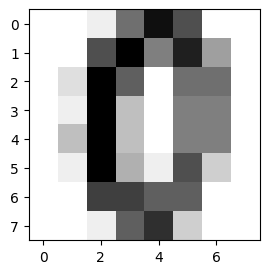

The 231th image is one of digit 5:


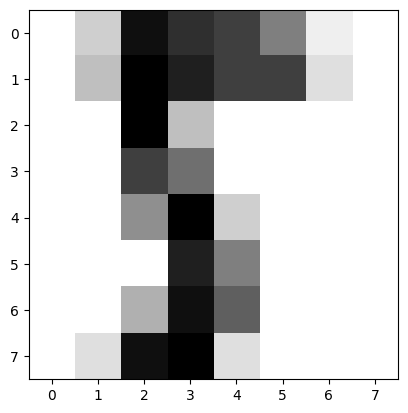

In [ ]:
import matplotlib.pyplot as plt # import matplotlib

# Display the first digit
plt.figure(1, figsize=(3, 3)) # We create a figure of size 3x3 so that we have a standard size figure for the images

# we have saved the images as 64x1 vectors, for the purpose of plotting we will
# convert them to size 8x8. For the rest of the questions just use array X
images = X.reshape(-1, 8, 8) # reshape will reshape the images from 64x1 to 8x8. the parameter -1 will take all images that are available. 
# The next 2 parameters are the height and width of the image

print('The 11th image is one of digit {}:'.format(y[10])) # this line will simply take the 11th image's label
plt.imshow(images[10], cmap=plt.cm.gray_r, interpolation='nearest') # This line will take the 11th image and plot it on the figure. It uses
# the cmap parameter to specify that we want to plot in grayscale. The r parameter means that we plot in reverse grayscale meaning that
# numbers in our vector wiith lower intensity will be lighter and darker areas will correspond to the higher intensity values. the interpolation
# set as nearest means that based on the intensity value of the pixel in the data array, it will take the closest value in the grayscale color
# spectrum to plot that pixel. for example, while 0 will be white and 16 will be black, 13 will be some darker shade of gray. 
plt.show() # this just shows the plot lol

print('The 231th image is one of digit {}:'.format(y[230])) # this line will simply take the 231th image's label
plt.imshow(images[230], cmap=plt.cm.gray_r, interpolation='nearest') # This line will take the 231th image and plot it on the figure. 
# This second image will be plotted in the same style as the first.
plt.show()

In this exercise we will ignore the existence of the labels and we will assign our images to different clusters based only on the images themselves.

This is called **clustering** and it's an **unsupervised** learning task, as it's done with no knowledge of the true labels. In contrast, both **classification** and **regression** are **supervised** learning tasks, as to train our models we need to know the true labels/response variable of the training data.

### The K-means algorithm

k-means is an algorithm that performs clustering. k is a parameter that indicates the number of clusters. After we choose what k to run the algorithm for, the algorithm proceeds as follows:

1.  We pick k points from the dataset at random. We call these points the "centroids" or the "representatives "of the clusters.
2.  For each point in the dataset we calculate its distance to the k centroids and we assign to the cluster with the closest centroid.
3. For each cluster, we calculate a new centroid as the mean of its points. These new centroids don't have to belong to the dataset.
4. We repeat steps 2 & 3 until the centroid positions don't change.

In our example, we know that we're dealing with digits so we will set k=10.

#### (c) Use sklearn's KMeans class to perform K-means clustering on the digits dataset. Store the result in a NumPy vector.

In [ ]:
from sklearn.cluster import KMeans # we import KMeans from sklearn

# Type your solution below

kmeans = KMeans(n_clusters=10, random_state=0) # We create a KMeans object with 10 clusters because we have 10 digits, we set k or the n_clusters parameter to 10. We also set the random
# state parameter to 0 because we want to ensure we have the same seed every time we run this code so that the random initialization is the same
# This means the centroids will always be the same
kmeans.fit(X) # This line will then fit every data point to the nearest centroid and the centroids will be updated based on the points assigned
# This means that they will slowly become the mean of all the points assigned. The coordinates of the centroids will then be saved after
# the function finishes
y_pred = kmeans.predict(X) # This will predict the labels for each data point based on the centroids that have been updated and save those 
# predictions to the y_pred vector. This function calculates the distance to each centroid and assigns each point to the closest centroid

### Clustering performance metrics

After performing clustering, you have assigned a label to each point in the dataset. However, this isn't necessarily the same label as the true label. Here for example, you may have correctly grouped all zeros to the same cluster but assigned this cluster the label 5. Thus, accuracy (as it was defined in Problem 1) it's not an informative metric for the performance of clustering algorithms.

An appropriate metric for clustering performance is the **Adjusted Rand index**, which is a function that measures the similarity between the true and the predicted label assignments, ignoring permutations.

#### (d) Calculate the algorithm's adjusted rand index using sklearn's built-in method and print out the result.

In [ ]:
from sklearn.metrics import adjusted_rand_score # this imports the adjusted rand index from sklearn

# type your solution below

ari = adjusted_rand_score(y, y_pred) # using the adjusted rand score function, we calculate the adjusted rand index between the true labels
# and the predicted labels that we calculated using kmeans.predict.y was the true labels that we initialized back in part a and y_pred was the
# vector that contained our predictions from part c.
print(ari) # we print our adjusted rand index

0.6153537727935613
